# Codon Optimization and mRNA Structure Analysis
This notebook generates and analyzes synonymous mRNA sequences for a protein target, focusing on codon usage, GC content, and design optimization.

In [2]:
!pip3 install pandas matplotlib seaborn

  Using cached matplotlib-3.10.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.4-cp313-cp313-macosx_10_13_universal2.whl.metadata (106 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.2.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (8.9 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 27.6 MB/s eta 0:00:00 0:00:01
Using cached matplotlib-3.10.3-cp313-cp313-macosx_11_0_arm64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp313-cp313-macosx_11_0_arm64.whl (255 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.58.4-cp313-cp313-macosx_10_13_universal2.whl (2.7 MB)
Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl (65 kB)
   ━━━━━━━━

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load generated mRNA variants
df = pd.read_csv("codon_optimized_mrnas.csv")
df.head()

,mRNA,GC%,Length
0,AUGUCAAAAGGCGAAGAAUUGUUCACGGGCGUUGUGCCAAUUCUCG...,47.619048,189
1,AUGAGUAAGGGUGAAGAACUAUUCACAGGGGUGGUACCAAUCUUAG...,50.264550,189
2,AUGUCUAAAGGGGAGGAAUUGUUCACGGGAGUCGUCCCUAUAUUGG...,50.793651,189
3,AUGUCGAAAGGAGAAGAGCUGUUCACAGGCGUGGUUCCUAUACUGG...,47.089947,189
4,AUGUCAAAGGGAGAGGAAUUGUUCACGGGUGUGGUCCCCAUUUUGG...,50.264550,189


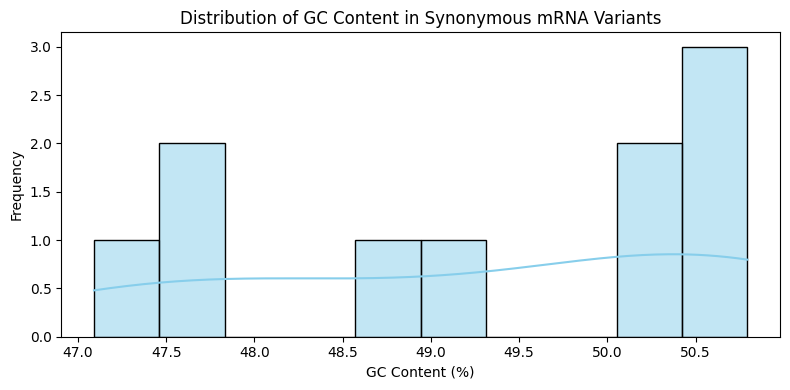

In [5]:
# Plot GC content
plt.figure(figsize=(8, 4))
sns.histplot(df["GC%"], bins=10, kde=True, color='skyblue')
plt.title("Distribution of GC Content in Synonymous mRNA Variants")
plt.xlabel("GC Content (%)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [6]:
# Select best candidate based on GC content closest to 50%
df['GC_diff'] = abs(df['GC%'] - 50)
best_variant = df.sort_values("GC_diff").iloc[0]
print("Best mRNA variant (GC% closest to 50%):")
print(best_variant)
print("\nSequence preview (first 100 nt):")
print(best_variant['mRNA'][:100])

Best mRNA variant (GC% closest to 50%):
mRNA       AUGAGUAAGGGUGAAGAACUAUUCACAGGGGUGGUACCAAUCUUAG...
GC%                                                 50.26455
Length                                                   189
GC_diff                                              0.26455
Name: 1, dtype: object

Sequence preview (first 100 nt):
AUGAGUAAGGGUGAAGAACUAUUCACAGGGGUGGUACCAAUCUUAGUUGAGUUGGAUGGCGACGUGAACGGCCAUAAGUUCUCCGUAAGCGGGGAAGGCG


In [7]:
# Save the best candidate
best_variant.to_frame().T.to_csv("best_mrna_variant.csv", index=False)
print("Saved as best_mrna_variant.csv")

Saved as best_mrna_variant.csv
